In [20]:
import qcodes as qc
import qcodes.instrument_drivers.nplab_drivers as npd
import numpy as np
import matplotlib.pyplot as plt
import lmfit

Create a manual parameter

In [2]:
M1 = qc.Parameter('M1', set_cmd=None, get_cmd=None)

In [3]:
M1(5.2)

In [4]:
M1()

5.2

Define a parameter that bases its value on M1

In [11]:
def m2getcmd():
    return M1()**2 - M1()*4 + np.random.randn()

In [12]:
M2 = qc.Parameter('M2', get_cmd=m2getcmd)

In [13]:
M1(2)

In [17]:
M2()

-4.412045614023662

Run a sweep

In [18]:
m1val = np.linspace(-1, 8, 101)
data1, plot1 = npd.single_param_sweep(M1, m1val, 0.1, M2, DataName='M1set_M2measurement')

Started at 2022-03-14 21:48:06
DataSet:
   location = 'data/2022-03-14/#001_M1set_M2measurement_21-48-01'
   <Type>   | <array_id> | <array.name> | <array.shape>
   Setpoint | M1_set     | M1           | (101,)
   Measured | M2         | M2           | (101,)
Finished at 2022-03-14 21:48:18


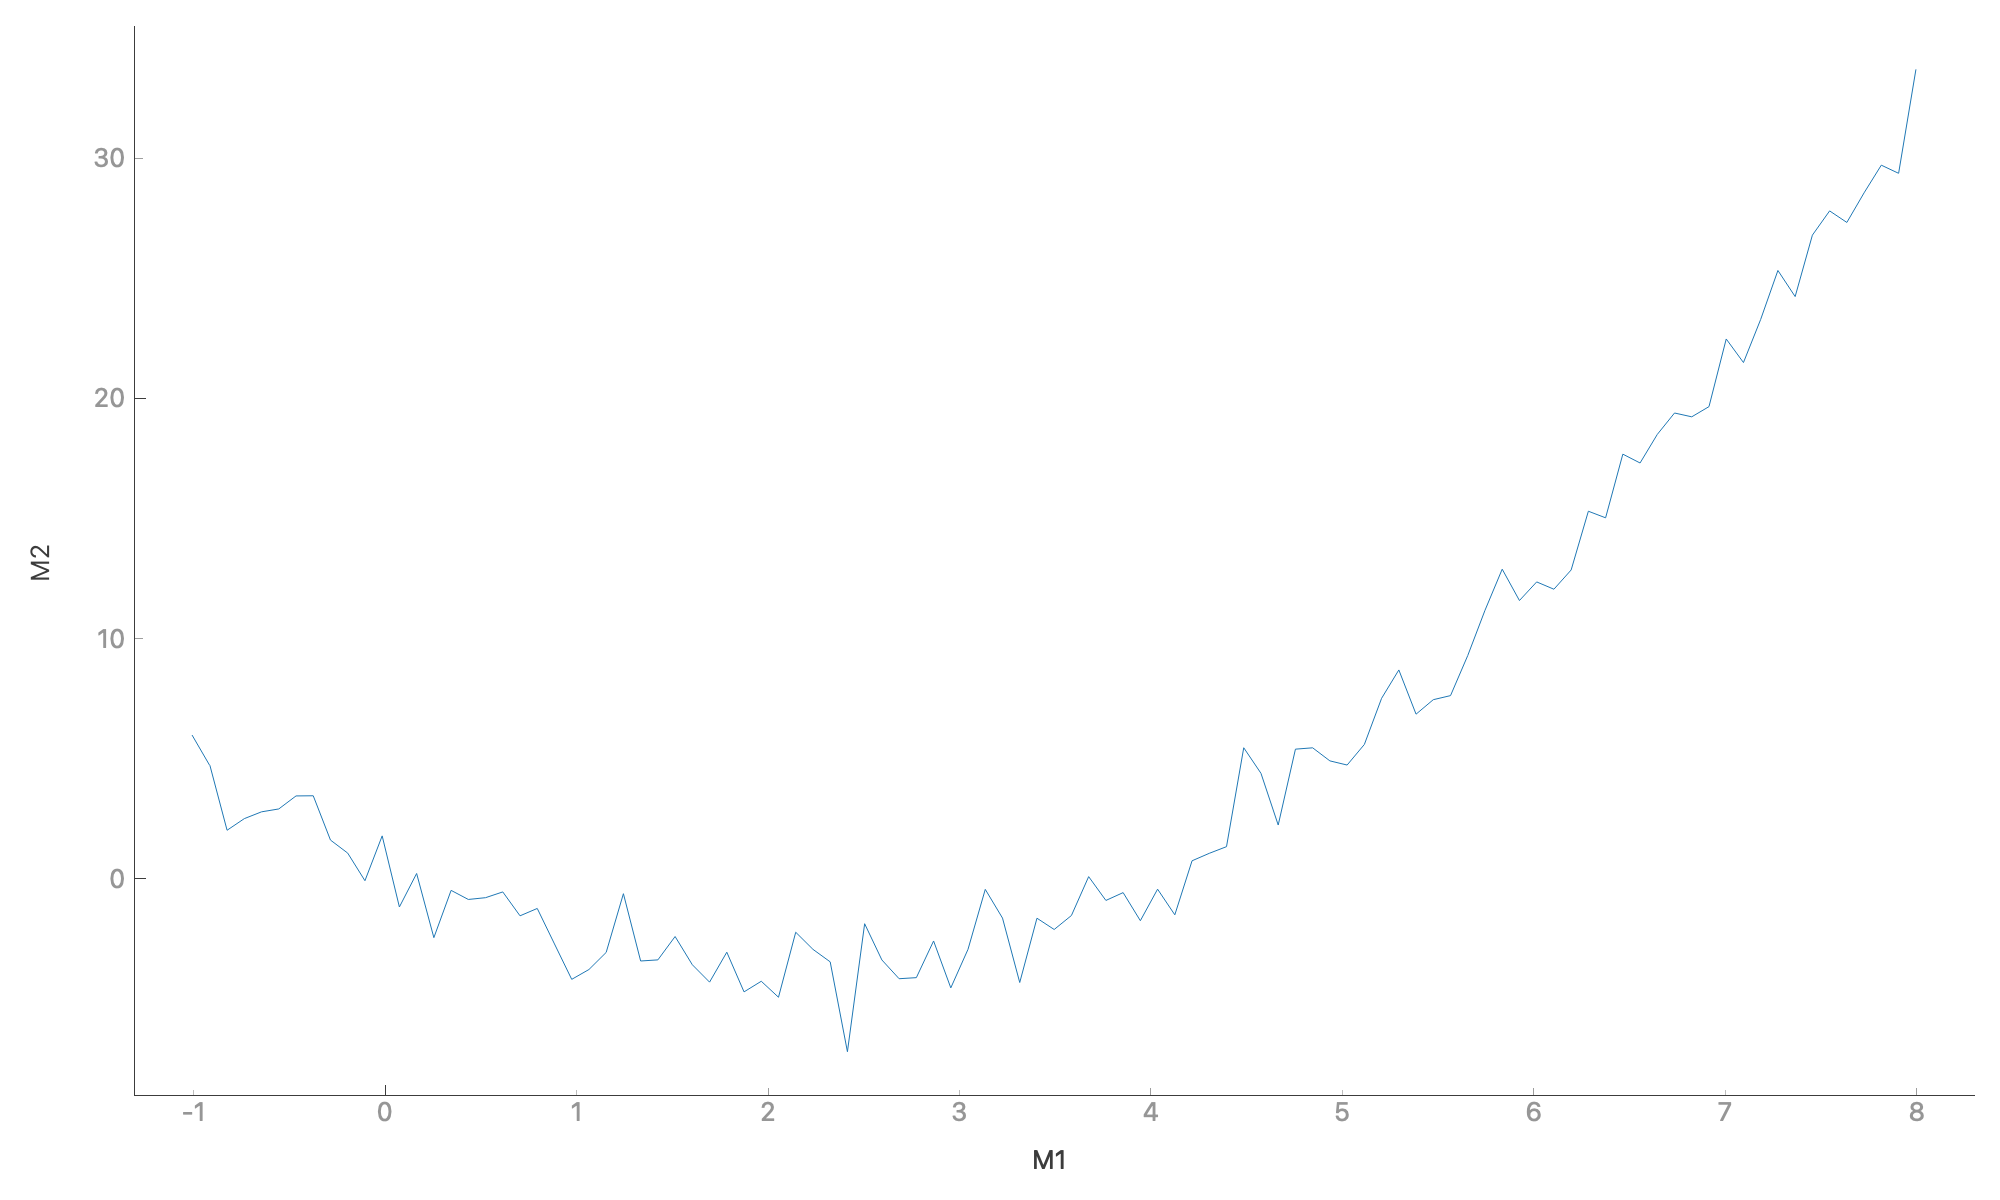

In [19]:
plot1

In [23]:
qmodel = lmfit.models.ParabolicModel()

In [28]:
qmodel.set_param_hint('a', value=1)
qmodel.set_param_hint('b', value=-4)
qmodel.set_param_hint('c', value=0.2)

In [29]:
results = qmodel.fit(data1.M2[:], x=data1.M1_set[:])

In [30]:
results.params

name,value,standard error,relative error,initial value,min,max,vary
a,1.00776429,0.01844145,(1.83%),1,-inf,inf,True
b,-4.05336430,0.13615036,(3.36%),-4,-inf,inf,True
c,0.27393617,0.21359294,(77.97%),0.2,-inf,inf,True


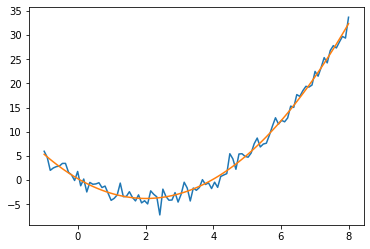

In [32]:
plt.figure()
plt.plot(data1.M1_set, data1.M2)
plt.plot(data1.M1_set, results.best_fit)